<a href="https://colab.research.google.com/github/shakeeluetp1041/Machine-Learning/blob/main/Convolutional_Neural_Network_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 13.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 351kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.21MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.18MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch: 1, Av_Loss: 0.0612,Loss_last_batch:0.0584


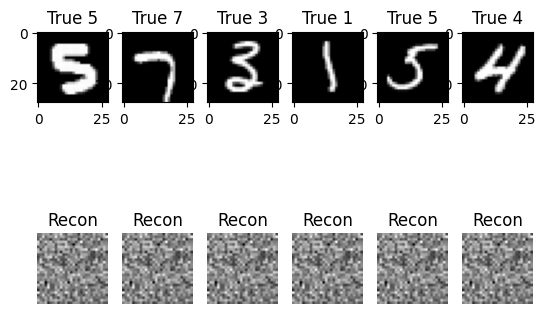

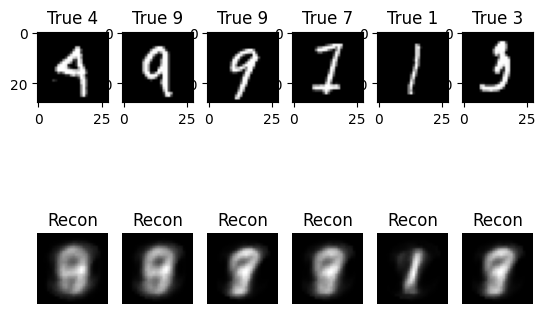

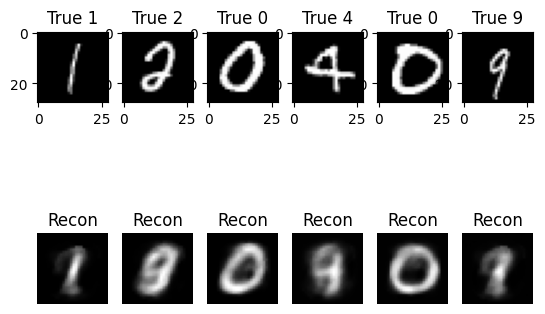

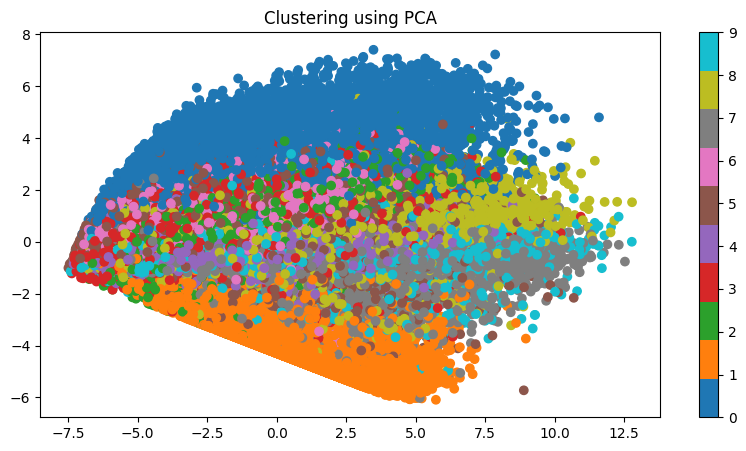

In [ ]:
# Below is the code for 1) Fully Connected AutoEncoder 2) Convolutional Auto Encode for MNIST digits
# To run any one of them uncomment and comment the respcetive lines. A comment is written in front of each line that need to be commented

import torch
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import os
from torch import nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# To remove the directory
#import shutil
# shutil.rmtree('./data')

# ## Device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'

# Download the EMNIST digit dataset and apply the transform
data_samples = torchvision.datasets.MNIST(root='./data',train=True,download=True,
                                          transform=transforms.ToTensor())
# test_samples = torchvision.datasets.MNIST(root='./data',train=False,download=True,
#                                           transform=transforms.ToTensor())
BATCH_SIZE=64
train_dataloader=DataLoader(dataset=data_samples,batch_size=BATCH_SIZE,shuffle=True,num_workers=os.cpu_count())
# test_dataloader=DataLoader(dataset=test_samples,batch_size=BATCH_SIZE,shuffle=True,num_workers=os.cpu_count())
images,labels=next(iter(train_dataloader))
images.shape,torch.max(images),torch.min(images)
##################################################
####   Fully Connected Auto Encoder ##############
##################################################
class Autoencoder_FullyConnected(nn.Module):
  def __init__(self,input_shape,output_shape):
    super().__init__()
    self.encoder=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64,out_features=12),
        nn.ReLU(),
        nn.Linear(in_features=12,out_features=3)
    )
    self.decoder=nn.Sequential(
        nn.Linear(in_features=3,out_features=12),
        nn.ReLU(),
        nn.Linear(in_features=12,out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64,out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=output_shape),
        nn.Sigmoid()
    )
  def forward(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded


##################################################
####   Convolutional Auto Encoder ##############
##################################################
# class Autoencoder_CNN(nn.Module):
#   def __init__(self,input_shape,output_shape):
#     super().__init__()
#     self.encoder=nn.Sequential(                            # Input size---->outputsize
#         nn.Conv2d(in_channels=input_shape,out_channels=16, #64,1,28,28 ---->64,16,14,14
#                   kernel_size=3,stride=2,padding=1),
#         nn.ReLU(),
#         nn.Conv2d(in_channels=16,out_channels=32,      #64,16,14,14 ---->64,32,7,7
#                   kernel_size=3,stride=2,padding=1),
#         nn.ReLU(),
#         nn.Conv2d(in_channels=32,out_channels=64,      #64,32,7,7 ---->64,64,1,1
#                   kernel_size=7)
#     )
#     self.decoder=nn.Sequential(
#         nn.ConvTranspose2d(in_channels=64,out_channels=32, #64,64,1,1 ---->64,32,7,7
#                            kernel_size=7),
#         nn.ReLU(),
#         nn.ConvTranspose2d(in_channels=32,out_channels=16,
#                            kernel_size=3,stride=2,padding=1,output_padding=1),#64,32,7,7 ---->64,16,14,14
#         nn.ReLU(),
#         nn.ConvTranspose2d(in_channels=16,out_channels=output_shape,
#                            kernel_size=3,stride=2,padding=1,output_padding=1),#64,16,14,14 ---->64,1,28,28
#         nn.Sigmoid()
#     )
#   def forward(self,x):
#     encoded=self.encoder(x)
#     print(encoded.shape)
#     decoded=self.decoder(encoded)
#     return decoded


### Model Instantiation######
model=Autoencoder_FullyConnected(input_shape=1*28*28,output_shape=1*28*28).to(device) ### For Fully Connected Auto Encoder
# model=Autoencoder_CNN(input_shape=1,output_shape=1).to(device) ### For Convolutional Auto Encoder
Optimizer =torch.optim.Adam(model.parameters(), lr=1e-3,weight_decay=1e-5)
loss_fn=nn.MSELoss()
epochs=1
model.train()
for epoch in range(epochs):
  train_loss=0
  stack_encoded_images=[]

  for train_batch, (X_train,y_train) in enumerate(train_dataloader):
    X_train,y_train=X_train.to(device),y_train.to(device)
    Y_model=model(X_train)
    loss=loss_fn(Y_model,X_train.reshape(-1,784)) ### For Fully Connected Auto Encoder
    # loss=loss_fn(Y_model,X_train)### For Convolutional Auto Encoder
    Optimizer.zero_grad()
    loss.backward()
    Optimizer.step()
    train_loss+=loss.item()
    if train_batch%468==0:
      Reconstruced_Images=Y_model.cpu().detach().numpy().reshape(-1,1,28,28)# For Fully Connected Auto Encoder
      # Reconstruced_Images=Y_model.cpu().detach().numpy()### For Convolutional Auto Encoder

##### Plotting the Random Images and their Reconstructed Versions#########
      nrows=2
      ncols=6
      random_images_index=torch.randint(0,len(y_train),(nrows*ncols,))
      plt.subplots(nrows,ncols)
      for i in range(ncols):
        plt.subplot(nrows,ncols,i+1)
        plt.imshow(X_train[random_images_index[i]].cpu().squeeze(),cmap='gray')
        plt.title(f'True {y_train[random_images_index[i]]}')

        plt.subplot(nrows,ncols,i+1+ncols)
        plt.imshow(Reconstruced_Images[random_images_index[i]].squeeze(),cmap='gray')
        plt.title('Recon')

        plt.axis(False)
  train_loss/=len(train_dataloader)
  print(f"Epoch: {epoch+1}, Av_Loss: {train_loss:.4f},Loss_last_batch:{loss.item():.4f}")


###### Plotting the Cluster for Latent Space in Fully Connected Auto Encoder#############
model.eval()
append_encoded_images=[]
append_targets=[]
with torch.no_grad():
  for i, (X_train,y_train) in enumerate(train_dataloader):
    X_train=X_train.to(device)
    encoded_images=model.encoder(X_train)
    append_encoded_images.append(encoded_images)
    append_targets.append(y_train)


  cancat_encoded_images=torch.cat(append_encoded_images,dim=0).cpu().numpy()
  cancat_targets=torch.cat(append_targets).cpu().numpy()
  pca=PCA(n_components=2)
  pca_result=pca.fit_transform(cancat_encoded_images)
  plt.figure(figsize=(10, 5))
  plt.scatter(pca_result[:, 0], pca_result[:, 1],c=cancat_targets,cmap='tab10')
  plt.colorbar(ticks=range(10))
  plt.title('Clustering using PCA')



  ###### Plotting the Cluster for Latent Space in Convolutional Auto Encoder#############
# model.eval()
# append_encoded_images=[]
# append_targets=[]
# with torch.no_grad():
#   for i, (X_train,y_train) in enumerate(train_dataloader):
#     X_train=X_train.to(device)
#     encoded_images=model.encoder(X_train)
#     append_encoded_images.append(encoded_images)
#     append_targets.append(y_train)


#   cancat_encoded_images=torch.cat(append_encoded_images,dim=0)
#   cancat_targets=torch.cat(append_targets).cpu().numpy()
#   pca=PCA(n_components=2)
#   pca_result=pca.fit_transform(cancat_encoded_images.cpu().reshape(cancat_encoded_images.shape[0],64).numpy())
#   plt.figure(figsize=(10, 5))
#   scatter =plt.scatter(pca_result[:, 0], pca_result[:, 1],c=cancat_targets,cmap='tab10')
#   cbar=plt.colorbar(scatter, ticks=range(10))
#   cbar.ax.tick_params(labelsize=20)
#   plt.xlabel('PCA Component 1', fontsize=22)
#   plt.ylabel('PCA Component 2', fontsize=22)
#   plt.title('Clustering using PCA', fontsize=22)
#   plt.tick_params(axis='both', which='major', labelsize=22)



NameError: name 'plot' is not defined